In [ ]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

import warnings
warnings.simplefilter("ignore")

# Comparing Two Samples

In [ ]:
births = Table.read_table('baby.csv')

In [ ]:
births

In [ ]:
smoking_and_birthweight = births.select('Maternal Smoker', 'Birth Weight')

In [ ]:
smoking_and_birthweight.group('Maternal Smoker')

In [ ]:
smoking_and_birthweight.hist('Birth Weight', group='Maternal Smoker')

# Test Statistic

[Question] What values of our statistic are in favor of the alternative: positive or negative?

In [ ]:
means_table = smoking_and_birthweight.group('Maternal Smoker', np.average)
means_table

In [ ]:
means = means_table.column(1)
observed_difference = means.item(1) - means.item(0)
observed_difference

In [ ]:
def difference_of_means(table, numeric_label, category_label):
    """
    Takes: 
       - name of table
       - column label of numerical variable
       - column label of categorical variable
       
    Returns: Difference of means of the two groups
    """
    
    #table with the two relevant columns
    reduced = table.select(numeric_label, category_label)  
    
    # table containing group means
    means_table = reduced.group(category_label, np.average)
    
    # array of group means
    means = means_table.column(1)
    
    return means.item(1) - means.item(0)

In [ ]:
difference_of_means(births, 'Birth Weight', 'Maternal Smoker')

# Random Permutation (Shuffling)

In [ ]:
staff = Table().with_columns(
    'Names', make_array('Jim', 'Pam', 'Dwight', 'Michael'),
    'Ages', make_array(29, 28, 34, 41)
)

In [ ]:
staff.sample()

In [ ]:
staff.sample(with_replacement = False)

In [ ]:
staff.with_column('Shuffled', staff.sample(with_replacement = False).column(0))

# Simulation Under Null Hypothesis

In [ ]:
smoking_and_birthweight

In [ ]:
shuffled_labels = smoking_and_birthweight.sample(with_replacement=False).column('Maternal Smoker')

In [ ]:
original_and_shuffled = smoking_and_birthweight.with_column(
    'Shuffled Label', shuffled_labels
)

In [ ]:
original_and_shuffled

In [ ]:
difference_of_means(original_and_shuffled, 'Birth Weight', 'Shuffled Label')

In [ ]:
difference_of_means(original_and_shuffled, 'Birth Weight', 'Maternal Smoker')

# Permutation Test

In [ ]:
def one_simulated_difference(table, numeric_label, category_label):
    """
    Takes: 
       - name of table
       - column label of numerical variable
       - column label of categorical variable
       
    Returns: Difference of means of the two groups
    """
    
    # array of shuffled labels
    shuffled_labels = table.sample(with_replacement = False).column(category_label)
    
    # table of numerical variable and shuffled labels
    shuffled_table = table.select(numeric_label).with_column('Shuffled Label', shuffled_labels)
    
    return difference_of_means(shuffled_table, numeric_label, 'Shuffled Label')   

In [ ]:
one_simulated_difference(births, 'Birth Weight', 'Maternal Smoker')

In [23]:
differences = make_array()

for i in np.arange(2500):
    new_difference = one_simulated_difference(births, 'Birth Weight', 'Maternal Smoker')
    differences = np.append(differences, new_difference)

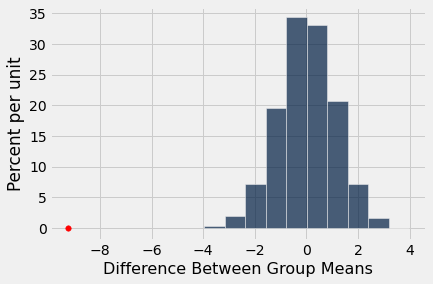

In [27]:
Table().with_column('Difference Between Group Means', differences).hist()

# Plotting details; ignore this code
plots.ylim(-0.02, 0.36)
plots.scatter(observed_difference, 0, color='red', s=30);